In [1]:
import pandas as pd
import os
import rasterio
import numpy as np
import geopandas as gpd
import xarray as xr
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt

def mkdir(dir):
    
    if not os.path.exists(dir):
        os.mkdir(dir)
        
path_run = os.getcwd() + '/'
path_data_processed = path_run + 'data_processed/'

path_QGIS_processed = path_data_processed + 'QGIS_processed/'
path_QGIS_processed_creator = mkdir(path_QGIS_processed)

/home/mester/.local/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


offset = 59.61411258152554 (for year 1973, unit: knots)
slope = 0.2810161889142899 (unit: knots per year)
slope = 0.14456709228982298  m/s


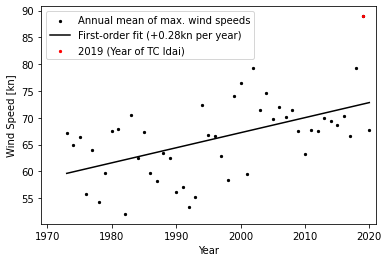

In [40]:
# Annual mean of max. wind speeds in the SI basin

IBTRACS_FILE = path_run + "data/IBTrACS/IBTrACS.ALL.v04r00.nc"

MIN_YEAR = 1970
MAX_YEAR = 2020

def main():
    with xr.open_dataset(IBTRACS_FILE) as ds:
        # filter relevant tracks
        ds = ds.sel(storm=(ds.basin == b'SI').any(dim="date_time"))
        maxwind = ds.wmo_wind.max(dim="date_time")
        year = ds.sid.str.slice(0, 4).astype(int)
        mask = np.isfinite(maxwind) & (year >= MIN_YEAR) & (year <= MAX_YEAR)
        maxwind = maxwind[mask]
        year = year[mask]

        # output as CSV
        df = pd.DataFrame({"year": year, "maxwind": maxwind})
        df = df.groupby(df.year).mean().reset_index()

        # linear regression
        b, m = Polynomial.fit(df.year - df.year[0], df.maxwind, 1, domain=[]).coef
        print("offset =", b, f"(for year {df.year[0]}, unit: knots)")
        print("slope =", m, "(unit: knots per year)")
        slope_ms = 0.514444 * m
        print("slope =", slope_ms," m/s")

        # plotting
        plt.scatter(
            df.year, df.maxwind, color = 'black',label="Annual mean of max. wind speeds", s=5)
        plt.plot(df.year, m * (df.year - df.year[0]) + b, color = 'black',
            label=f"First-order fit ({m:+.2f}kn per year)")
        plt.xlabel("Year")
        plt.ylabel("Wind Speed [kn]")
        
        # Show Idai


        for i in range(len(df)):

            if df.year[i] == 2019:

                x_Idai = df.year[i]
                y_Idai = df.maxwind[i]

        plt.scatter(x_Idai,y_Idai,color ='red',label='2019 (Year of TC Idai)', s=5)
        
        plt.legend()
        plt.xticks(np.arange(1970,2021,10))
        plt.xlim(1969,2021)
        
        plt.savefig(path_run + 'plots/annual_mean_max_windspeed_SI_basin.png',dpi = 300)

        plt.show()
 
        return(m)

if __name__ == "__main__":
    
    knots_p_y = main()

In [22]:
# IDMC

IDMC = pd.read_csv(path_run + 'data/IDMC/IDMC_GIDD_disasters_internal_displacement_data_2021.csv')
IDMC = IDMC[IDMC['Hazard Category'] == 'Weather related']

TC = IDMC[IDMC['Hazard Type'] == 'Storm']
F = IDMC[IDMC['Hazard Type'] == 'Flood']

# print(F['Internal Displacements'].sum())
# print(F['Internal Displacements'].sum()/IDMC['Internal Displacements'].sum())
# print(TC['Internal Displacements'].sum())
print(TC['Internal Displacements'].sum()/len(IDMC.Year.unique()))
print(TC['Internal Displacements'].sum()/IDMC['Internal Displacements'].sum())
# print(IDMC['Internal Displacements'].sum())

9337699.92857143
0.4277959609484465


In [13]:
TC.sort_values('Internal Displacements',ascending=False)[0:20]#.iloc[5]['Event Name']

,ISO3,Name,Year,Start Date,Event Name,Hazard Category,Hazard Type,Internal Displacements
8646,PHL,Philippines,2013,2013-11-08,Typhoon Haiyan (Local Name: Yolanda),Weather related,Storm,4095280.0
8900,PHL,Philippines,2021,2021-12-11,"Philippines, Palau, Viet Nam: Typhoon Rai (loc...",Weather related,Storm,3914823.0
8664,PHL,Philippines,2014,2014-07-15,Typhoon Rammasun (local name: Glenda),Weather related,Storm,2994054.0
2972,CUB,Cuba,2008,2008-08-09,Hurricane Ike,Weather related,Storm,2616000.0
8706,PHL,Philippines,2016,2016-12-23,Typhoon Nock-Ten (locally known as: Nina),Weather related,Storm,2592251.0
997,BGD,Bangladesh,2020,2020-05-16,"India, Bangladesh, Myanmar, Bhutan: Cyclone Am...",Weather related,Storm,2508819.0
5607,IND,India,2020,2020-05-16,"India, Bangladesh, Myanmar, Bhutan: Cyclone Am...",Weather related,Storm,2441213.0
8689,PHL,Philippines,2016,2016-10-14,Typhoon Haima,Weather related,Storm,2376723.0
5447,IND,India,2009,2009-01-01,Cyclone 'Aila',Weather related,Storm,2300000.0
6935,MMR,Myanmar,2008,2008-02-05,NaN,Weather related,Storm,2250000.0


In [14]:
2508819+2441213

4950032

In [50]:
# EMDAT

EMDAT = pd.read_csv(path_run + 'data/EM-DAT/emdat_public_2022_04_21_query_uid-6A34nb.csv')
EMDAT = EMDAT[EMDAT['Year']>=1980]

EMDAT_analyse = pd.DataFrame()
ISO_list = []
EMDAT_len_list = []

for ISO_temp in EMDAT.ISO.unique():
    
    EMDAT_temp = EMDAT[EMDAT['ISO']==ISO_temp]
  
    ISO_list.append(ISO_temp)
    EMDAT_len_list.append(len(EMDAT_temp))
    
EMDAT_analyse['ISO'] = ISO_list   
EMDAT_analyse['number_TC'] = EMDAT_len_list   
    
print("TC per year:",(len(EMDAT)/len(EMDAT.Year.unique())))
EMDAT_analyse.sort_values('number_TC',ascending=False)[0:5]

TC per year: 45.166666666666664


,ISO,number_TC
30,PHL,259
3,CHN,159
46,VNM,100
44,USA,97
33,MEX,96


In [49]:
# Yearly damages since 2008

EMDAT_TC = EMDAT[EMDAT['Disaster Subtype'] == 'Tropical cyclone']
EMDAT_TC = EMDAT_TC[EMDAT_TC['Year'] >= IDMC.Year.unique().min()]
print(round(EMDAT_TC["Total Damages, Adjusted ('000 US$)"].sum()/(len(IDMC.Year.unique())*1_000_000),1), 'billion') # billion

57.2 billion


In [ ]:
# GADM

GID_0 = gpd.read_file(path_run + 'data/states/gadm36_levels_shp/gadm36_0.shp')
GID_0_moz = GID_0[GID_0['GID_0'] == 'MOZ']
GID_0_moz.to_file(path_data + 'GADM/MOZ_national.shp')

GID_1 = gpd.read_file(path_run + 'data/states/gadm36_levels_shp/gadm36_1.shp')
GID_1_moz = GID_1[GID_1['GID_0'] == 'MOZ']
GID_1_moz.to_file(path_data + 'GADM/MOZ_provinces.shp')

In [20]:
# QGIS

districts = gpd.read_file(path_run + 'data/admin_polygons/moz_admbnda_adm4_REACH_v2.shp')
districts = districts[districts['ADM3_EN'] == 'Cidade Da Beira']
Beira = districts[~districts['OBJECTID'].isin([1,13,21,22,23])]
Beira.to_file(path_run + 'data_processed/QGIS_processed/Beira_districts.shp')

In [2]:
for filename in sorted(os.listdir(f"{path_run}data_processed/flood_product_merged/")):
    print(filename)
    
    f = rasterio.open(f"{path_run}data_processed/flood_product_merged/" + filename).read()
    f[f==0]=np.nan
    profile = rasterio.open(f"{path_run}data_processed/flood_product_merged/" + filename).profile

    with rasterio.open(f"{path_run}data_processed/QGIS_processed/" + 'QGIS_' + filename, "w", **profile) as dest:
        dest.write(f) 

flood_product_merged_cf_max.tif
flood_product_merged_cfwindzos105_max.tif


In [24]:
pop = rasterio.open(path_run + 'data_processed/population_processed/MOZ_GHSL_9as_clipped.tif').read()
pop[pop==0]=np.nan
profile = rasterio.open(path_run + 'data_processed/population_processed/MOZ_GHSL_9as_clipped.tif').profile

with rasterio.open(f"{path_run}data_processed/QGIS_processed/QGIS_population_plot.tif", "w", **profile) as dest:
    dest.write(pop) 

In [25]:
# factual

f = rasterio.open(path_run + 'data/GeoClaw/factual/2019063S18038_cf-zos_aviso-fes_no.tif').read()
f[f==0]=np.nan
profile = rasterio.open(path_run + 'data/GeoClaw/counterfactual/2019063S18038_cfwindzos100-zos_aviso-fes_no.tif').profile

with rasterio.open(path_run + 'plots/f.tif', "w", **profile) as dest:
    dest.write(f) 
    
f = rasterio.open(path_run + 'data/GeoClaw/factual/2019063S18038_cf-zos_aviso-fes_min.tif').read()
f[f==0]=np.nan
profile = rasterio.open(path_run + 'data/GeoClaw/counterfactual/2019063S18038_cfwindzos100-zos_aviso-fes_min.tif').profile

with rasterio.open(path_run + 'plots/f_min.tif', "w", **profile) as dest:
    dest.write(f) 
    
f = rasterio.open(path_run + 'data/GeoClaw/factual/2019063S18038_cf-zos_aviso-fes_mean.tif').read()
f[f==0]=np.nan
profile = rasterio.open(path_run + 'data/GeoClaw/counterfactual/2019063S18038_cfwindzos100-zos_aviso-fes_mean.tif').profile

with rasterio.open(path_run + 'plots/f_mean.tif', "w", **profile) as dest:
    dest.write(f) 
    
f = rasterio.open(path_run + 'data/GeoClaw/factual/2019063S18038_cf-zos_aviso-fes_max.tif').read()
f[f==0]=np.nan
profile = rasterio.open(path_run + 'data/GeoClaw/counterfactual/2019063S18038_cfwindzos100-zos_aviso-fes_max.tif').profile

with rasterio.open(path_run + 'plots/f_max.tif', "w", **profile) as dest:
    dest.write(f) 

    
# cf
    
cf = rasterio.open(path_run + 'data/GeoClaw/counterfactual/2019063S18038_cfwindzos105-zos_aviso-fes_no.tif').read()
cf[cf==0]=np.nan
profile = rasterio.open(path_run + 'data/GeoClaw/counterfactual/2019063S18038_cfwindzos105-zos_aviso-fes_no.tif').profile

with rasterio.open(path_run + 'plots/cf.tif', "w", **profile) as dest:
    dest.write(cf) 
    
    
cf = rasterio.open(path_run + 'data/GeoClaw/counterfactual/2019063S18038_cfwindzos105-zos_aviso-fes_max.tif').read()
cf[cf==0]=np.nan
profile = rasterio.open(path_run + 'data/GeoClaw/counterfactual/2019063S18038_cfwindzos105-zos_aviso-fes_max.tif').profile

with rasterio.open(path_run + 'plots/cf_max.tif', "w", **profile) as dest:
    dest.write(cf) 
    
cf = rasterio.open(path_run + 'data/GeoClaw/counterfactual/2019063S18038_cfwindzos105-zos_aviso-fes_min.tif').read()
cf[cf==0]=np.nan
profile = rasterio.open(path_run + 'data/GeoClaw/counterfactual/2019063S18038_cfwindzos105-zos_aviso-fes_min.tif').profile

with rasterio.open(path_run + 'plots/cf_min.tif', "w", **profile) as dest:
    dest.write(cf) 
    
cf = rasterio.open(path_run + 'data/GeoClaw/counterfactual/2019063S18038_cfwindzos105-zos_aviso-fes_mean.tif').read()
cf[cf==0]=np.nan
profile = rasterio.open(path_run + 'data/GeoClaw/counterfactual/2019063S18038_cfwindzos105-zos_aviso-fes_mean.tif').profile

with rasterio.open(path_run + 'plots/cf_mean.tif', "w", **profile) as dest:
    dest.write(cf) 

In [27]:
# TC Track

IBTrACS = gpd.read_file(path_run + 'data/IBTrACS/2000_IBTrACS.shp')
Idai_track = IBTrACS[IBTrACS.NAME == 'IDAI']
Idai_track.to_file(path_run + 'data/IBTrACS/Idai_track.shp')

In [29]:
# TC wind speeds

path_data = path_run + 'data/'
path_TC_wind_speed_processed = path_data_processed + 'TC_wind_speed_processed/'
path_TC_wind_speed_processed_creator = mkdir(path_TC_wind_speed_processed)

In [30]:
## TC ##

import fiona
import rasterio.mask
mask = None
        
for TC_threshold_kn in [64,96]:
        
# TC_threshold = 64 # knots, hurricane


    with fiona.open(path_data_processed + "GeoClaw_processed_shp/GeoClaw_outline.shp", "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]

    with rasterio.open(path_data + "TC_wind_speeds/TC_2019_max.tif") as src:
        out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
        out_meta = src.meta

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    path_Idai_TC_cropped = path_TC_wind_speed_processed + "Idai_TC_cropped.tif" 

    with rasterio.open(path_Idai_TC_cropped, "w", **out_meta) as dest:
            dest.write(out_image) 
        

    knots_ms_conversion_factor = 1.943844754838655
    TC_threshold = TC_threshold_kn / knots_ms_conversion_factor  # conversion to m/s
#     print(out_image.max())

    out_image[out_image < TC_threshold] = np.nan
    out_image[out_image >= TC_threshold] = 1
    


    path_Idai_TC_binary_cropped = f"{path_TC_wind_speed_processed}Idai_TC_binary_cropped_{TC_threshold_kn}.tif" 

    with rasterio.open(path_Idai_TC_binary_cropped, "w", **out_meta) as dest:
            dest.write(out_image) 
    #


    Idai_TC_shp = f"{path_TC_wind_speed_processed}Idai_TC_{TC_threshold_kn}.shp"


    from rasterio.features import shapes

    with rasterio.Env():
        with rasterio.open(path_Idai_TC_binary_cropped) as src:
            image = src.read()

            results = (
            {'properties': {'raster_val': v}, 'geometry': s}
            for i, (s, v)
            in enumerate(
            shapes(image, mask=mask, transform=src.transform)))

            with fiona.open(
            Idai_TC_shp, 'w',
            driver='Shapefile',
            crs=src.crs,
            schema={'properties': [('raster_val', 'int')],
            'geometry': 'Polygon'}) as dst:
                dst.writerecords(results)

    shape = gpd.read_file(Idai_TC_shp)
    shape = shape[shape['raster_val'] == 1]

    if len(shape) != 0:

        Idai_TC_shp_dissolved = shape.dissolve(by='raster_val') #cascaded_union
        Idai_TC_shp_dissolved_name = f"{path_TC_wind_speed_processed}Idai_TC_final_{TC_threshold_kn}.shp"
        Idai_TC_shp_dissolved.to_file(Idai_TC_shp_dissolved_name)

In [31]:
## TC ## counter factual 10%

import fiona
import rasterio.mask
mask = None
        
for TC_threshold_kn in [64,96]:
        
# TC_threshold = 64 # knots, hurricane


    with fiona.open(path_data_processed + "GeoClaw_processed_shp/GeoClaw_outline.shp", "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]

    with rasterio.open(path_data + "TC_wind_speeds/TC_2019_max.tif") as src:
        out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
        out_meta = src.meta

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})
    
    out_image = out_image*0.9

    path_Idai_TC_cropped = path_TC_wind_speed_processed + "Idai_TC_cropped_cf.tif" 

    with rasterio.open(path_Idai_TC_cropped, "w", **out_meta) as dest:
            dest.write(out_image) 
        

    knots_ms_conversion_factor = 1.943844754838655
    TC_threshold = TC_threshold_kn / knots_ms_conversion_factor  # conversion to m/s
#     print(out_image.max())

    out_image[out_image < TC_threshold] = np.nan
    out_image[out_image >= TC_threshold] = 1
    


    path_Idai_TC_binary_cropped = f"{path_TC_wind_speed_processed}Idai_TC_binary_cropped_{TC_threshold_kn}_cf.tif" 

    with rasterio.open(path_Idai_TC_binary_cropped, "w", **out_meta) as dest:
            dest.write(out_image) 
    #


    Idai_TC_shp = f"{path_TC_wind_speed_processed}Idai_TC_{TC_threshold_kn}_cf.shp"


    from rasterio.features import shapes

    with rasterio.Env():
        with rasterio.open(path_Idai_TC_binary_cropped) as src:
            image = src.read()

            results = (
            {'properties': {'raster_val': v}, 'geometry': s}
            for i, (s, v)
            in enumerate(
            shapes(image, mask=mask, transform=src.transform)))

            with fiona.open(
            Idai_TC_shp, 'w',
            driver='Shapefile',
            crs=src.crs,
            schema={'properties': [('raster_val', 'int')],
            'geometry': 'Polygon'}) as dst:
                dst.writerecords(results)

    shape = gpd.read_file(Idai_TC_shp)
    shape = shape[shape['raster_val'] == 1]

    if len(shape) != 0:

        Idai_TC_shp_dissolved = shape.dissolve(by='raster_val') #cascaded_union
        Idai_TC_shp_dissolved_name = f"{path_TC_wind_speed_processed}Idai_TC_final_{TC_threshold_kn}_cf.shp"
        Idai_TC_shp_dissolved.to_file(Idai_TC_shp_dissolved_name)

# Affected by high wind speeds

In [32]:
import os
import pandas as pd

results = pd.DataFrame()
for filename in sorted(os.listdir(f"{path_data_processed}affected_people/")):
    print(filename)
    results_temp = pd.read_csv(f"{path_data_processed}affected_people/" + filename)
    results = results.append(results_temp)
    
    


results_max_100_wind_final.csv
results_max_10_wind_final.csv
results_max_50_wind_final.csv
results_mean_100_wind_final.csv
results_mean_10_wind_final.csv
results_mean_50_wind_final.csv
results_min_100_wind_final.csv
results_min_10_wind_final.csv
results_min_50_wind_final.csv
results_no_100_wind_final.csv
results_no_10_wind_final.csv
results_no_50_wind_final.csv


In [33]:
results.sort_values('affected_wind_96', ascending = False)

,scenario,tide,threshold,affected,affected_wind_64,affected_wind_64_cf,affected_wind_96,affected_wind_96_cf
8,cfwindzos095,mean,100,1199317,1438697.0,1137304.0,359764.0,0.0
6,cfwindzos085,mean,100,1199317,1438697.0,1137304.0,359764.0,0.0
4,cfwindzos075,mean,100,1199385,1438675.0,1137282.0,359764.0,0.0
7,cfwindzos090,mean,100,1199317,1438697.0,1137304.0,359764.0,0.0
3,cfwindzos070,mean,100,1199385,1438675.0,1137282.0,359764.0,0.0
...,...,...,...,...,...,...,...,...
27,cfzos080,max,10,2054166,1138279.0,844023.0,119868.0,0.0
26,cfzos075,max,10,2054404,1138263.0,844008.0,119868.0,0.0
25,cfzos070,max,10,2055462,1138263.0,844008.0,119868.0,0.0
24,cfzos065,max,10,2055852,1138263.0,844008.0,119868.0,0.0
